In [1]:
import os
images = os.listdir('left/skyscraper')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

imageL = cv2.imread('left/skyscraper/'+images[50000])
imageR = cv2.imread('right/skyscraper/'+images[50000][0:-4]+'_R.jpg')

plt.imshow(imageL)
plt.show()
plt.imshow(imageR)
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

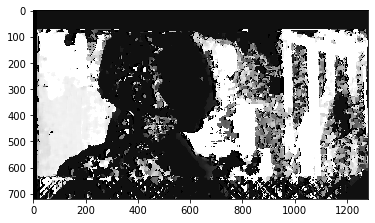

In [3]:
imgRBW = cv2.cvtColor(imageR, cv2.COLOR_BGR2GRAY)
imgLBW = cv2.cvtColor(imageL, cv2.COLOR_BGR2GRAY)

stereo = cv2.StereoSGBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgRBW,imgLBW)

plt.imshow(disparity,'gray')
plt.show()

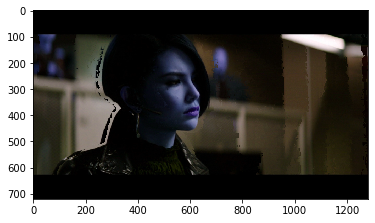

In [15]:
def get_reconstruction(depth_map, imageR):
    '''Uses depth map to reconstruct the left image
    from the right image.'''
    imageL = imageR.copy()
    for image in depth_map:
        for i, col in enumerate(image):
            for j, row in enumerate(col):
                disparity = int(depth_map[0][i][j]/10)
                i = max(min(719, i), 1)
                k = max(min(1279, j+disparity), 1)
                imageL[i][j] = imageR[i][k]
    return imageL
import torch

output = get_reconstruction(torch.as_tensor(disparity).view(1,720,1280), imageR)
plt.imshow(output, 'gray')
plt.show()


In [60]:
def get_reconstruction(depth_map, imageR):
    '''Uses depth map to reconstruct the left image
    from the right image.'''
    imageL = imageR.copy()
    depth_map = depth_map.view(720,1280)
    dest_indeces = np.meshgrid(719,1279)
    source_indeces = torch.zeros(2,720,1280)
    source_indeces[0] = torch.as_tensor(dest_indeces[0]) 
    source_indeces[1] = np.add(dest_indeces[1], depth_map/20)
    source_indeces[source_indeces > 1219] = 1219
    imageL[dest_indeces] = imageR[source_indeces]
    return imageL
import torch

output = get_reconstruction(torch.as_tensor(disparity).view(1,720,1280), imageR)
plt.imshow(output, 'gray')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices